# Restrictions at the End of the COVID-19 Pandemic

Explore the impact of COVID-19 restrictions on Mental Health related searches by forecasting searches with COVID-19 Restrictions as Exogenous features and without Exogenous features and comparing MSE.

In [3]:
import matplotlib.pyplot as plt
import functions
import numpy as np
np.random.seed(42)

from sklearn.linear_model import Ridge

import warnings
warnings.simplefilter('ignore')

---

In [4]:
# We are looking at the end of the pandemic.
period = '2021-01-01'

# Number of weeks to predict.
steps = 7

# Recursive multi-step forecasting with exogenous variables


## Forecasting Searches for Most Restricted States 

### with Exoginous Variables 


 Forecast for most_restricted and depression untill 2021-01-01 

Test error (mse): 31.12 



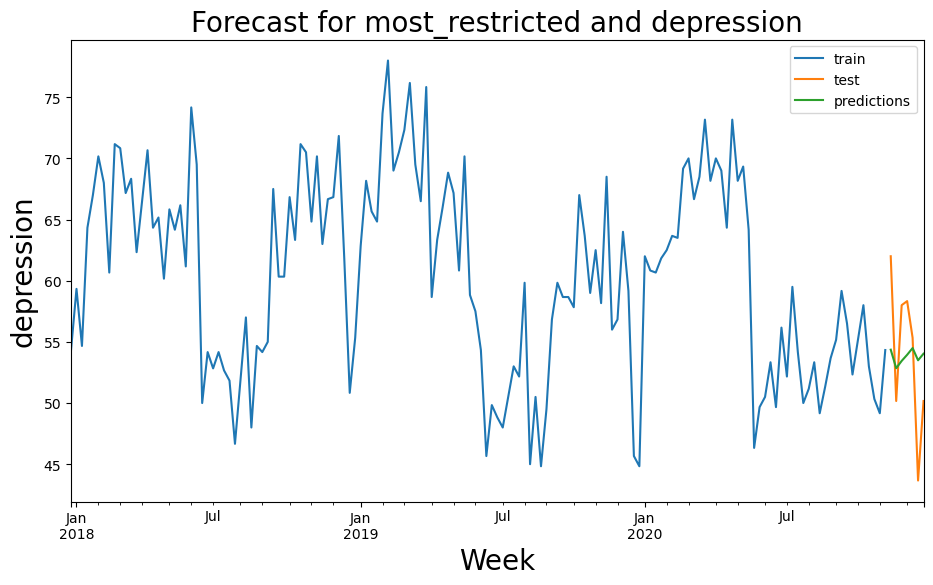


 Forecast for most_restricted and anxiety untill 2021-01-01 

Test error (mse): 23.86 



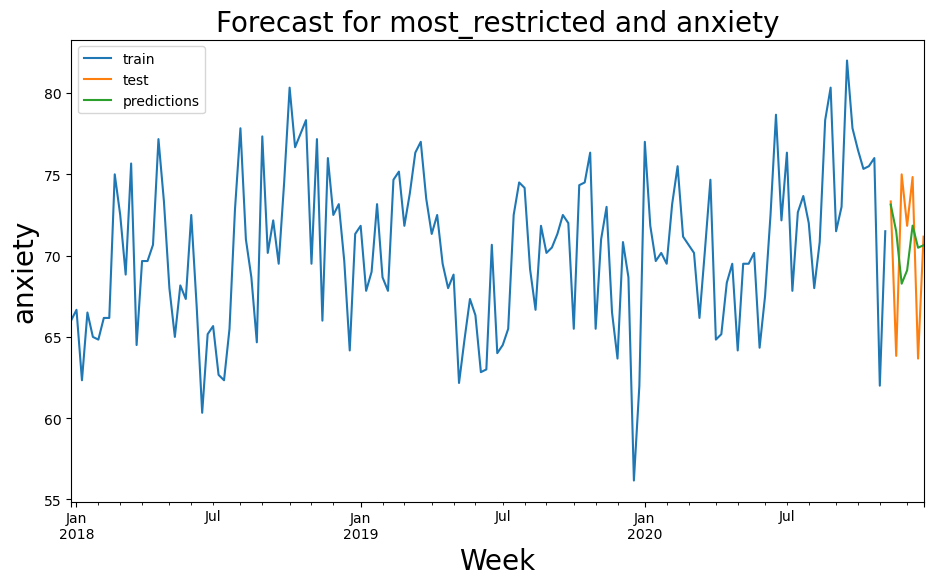


 Forecast for most_restricted and addiction untill 2021-01-01 

Test error (mse): 15.7 



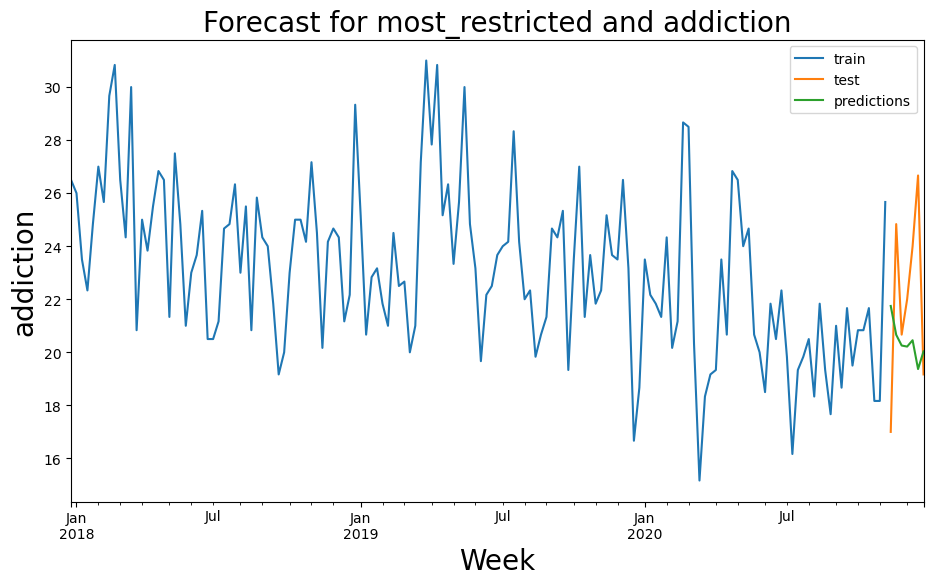


 Forecast for most_restricted and counselling untill 2021-01-01 

Test error (mse): 50.19 



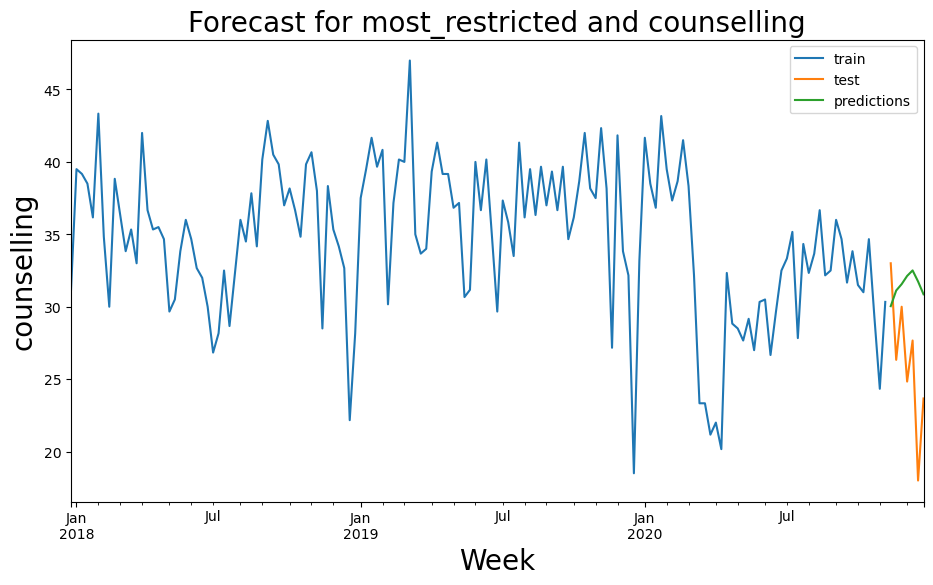


 Forecast for most_restricted and mental_health untill 2021-01-01 

Test error (mse): 73.63 



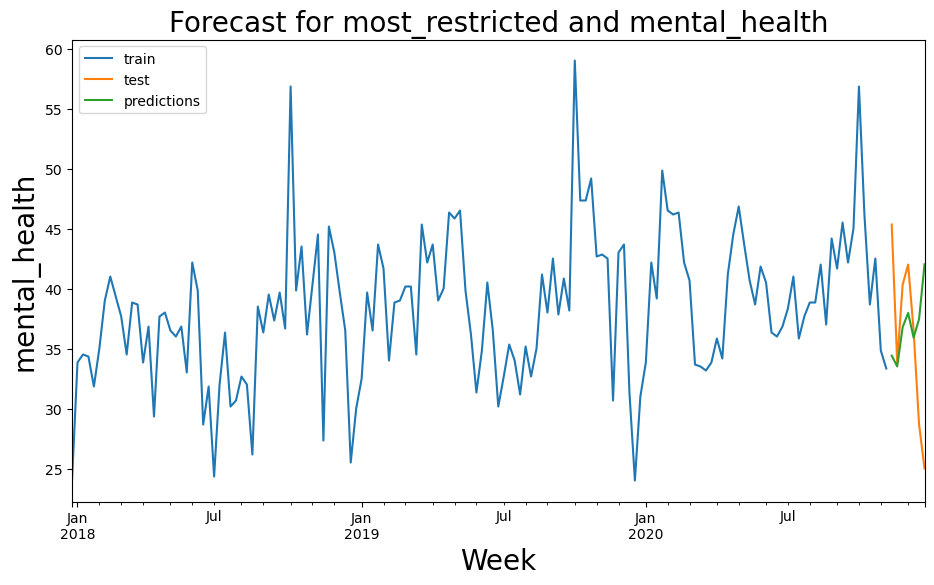

In [5]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
fa_mse_dic_most = {}
for search in searches_list:
        mse = functions.forecast_file_search(file='most_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        plt.show()
        fa_mse_dic_most[f'{search}_ex'] = mse

Mean Standard Error (MSE) for all models is significantly lower than 100, which is a relatively good result. We tried hyperparameter tuning but it did not improve the MSE. 

### without Exoginous Variables 

In [6]:
for search in searches_list:
        mse = functions.forecast_file_search_without_exogin(file='most_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        fa_mse_dic_most[search] = mse


 Forecast for most_restricted and depression untill 2021-01-01 

Test error (mse): 48.8 


 Forecast for most_restricted and anxiety untill 2021-01-01 

Test error (mse): 27.92 


 Forecast for most_restricted and addiction untill 2021-01-01 

Test error (mse): 12.75 


 Forecast for most_restricted and counselling untill 2021-01-01 

Test error (mse): 61.63 


 Forecast for most_restricted and mental_health untill 2021-01-01 

Test error (mse): 68.75 



In [7]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
rf_diff_most = functions.dict_diff(fa_mse_dic_most)
print(rf_diff_most)

{'depression': -17.68, 'anxiety': -4.06, 'addiction': 2.95, 'counselling': -11.44, 'mental_health': 4.88}


The models for the most restricted states were improved when it came to forecasting 'anxiety', 'counselling' and particularly 'depression', when exogenous features were included in the modelling. The models for forecasting 'addiction' and 'mental health' performed slightly worse when exogenous features were included.

---

## Forecasting Searches for Least Restricted States 

###  with Exoginous Variables 


 Forecast for least_restricted and depression untill 2021-01-01 

Test error (mse): 96.13 



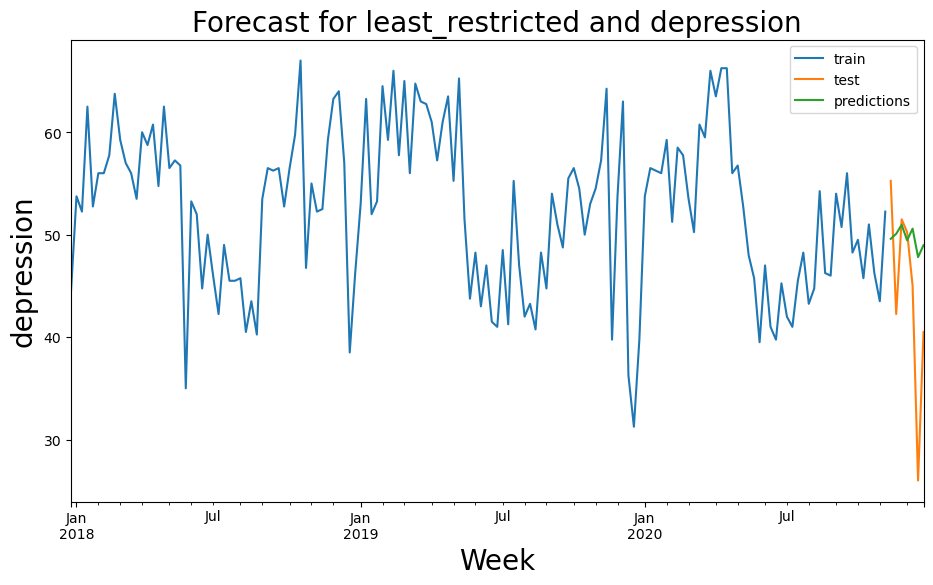


 Forecast for least_restricted and anxiety untill 2021-01-01 

Test error (mse): 36.61 



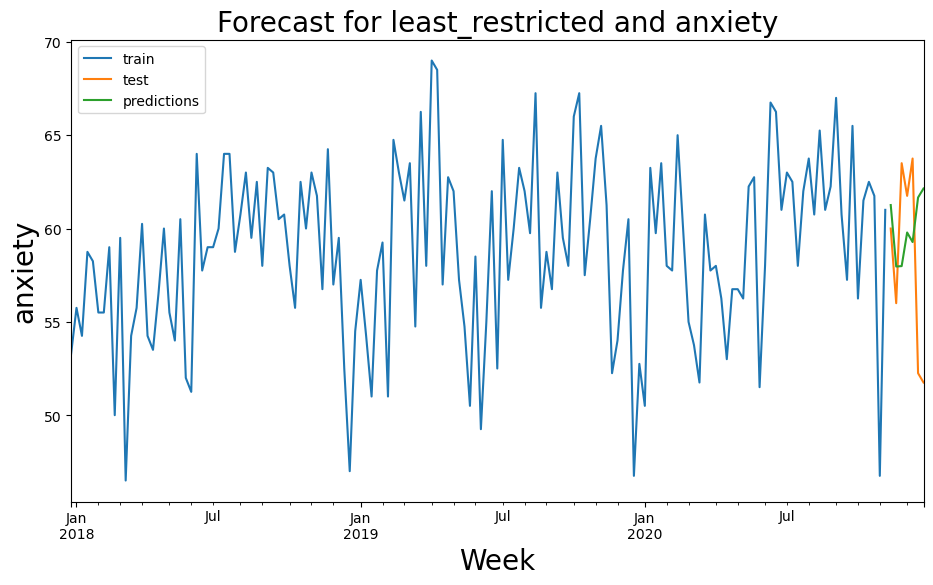


 Forecast for least_restricted and addiction untill 2021-01-01 

Test error (mse): 12.66 



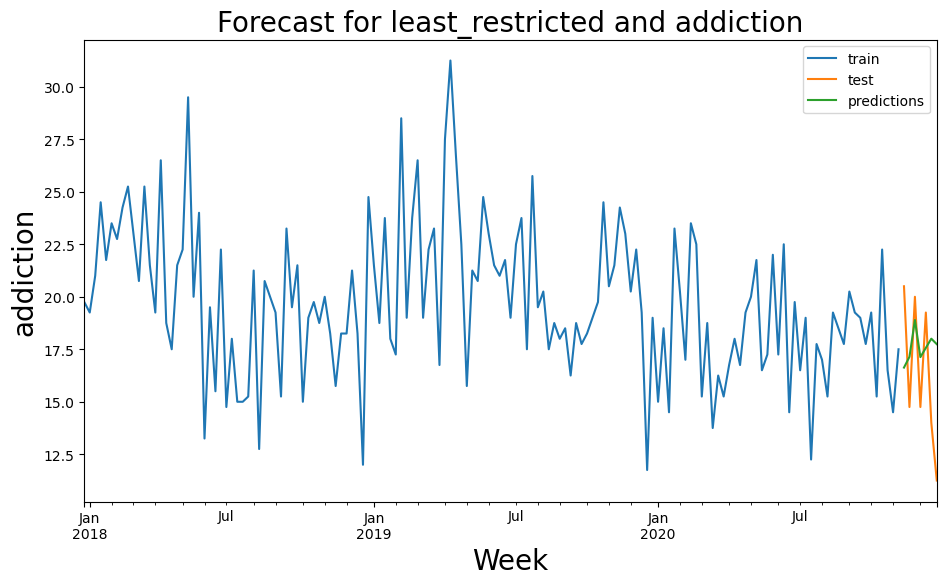


 Forecast for least_restricted and counselling untill 2021-01-01 

Test error (mse): 100.65 



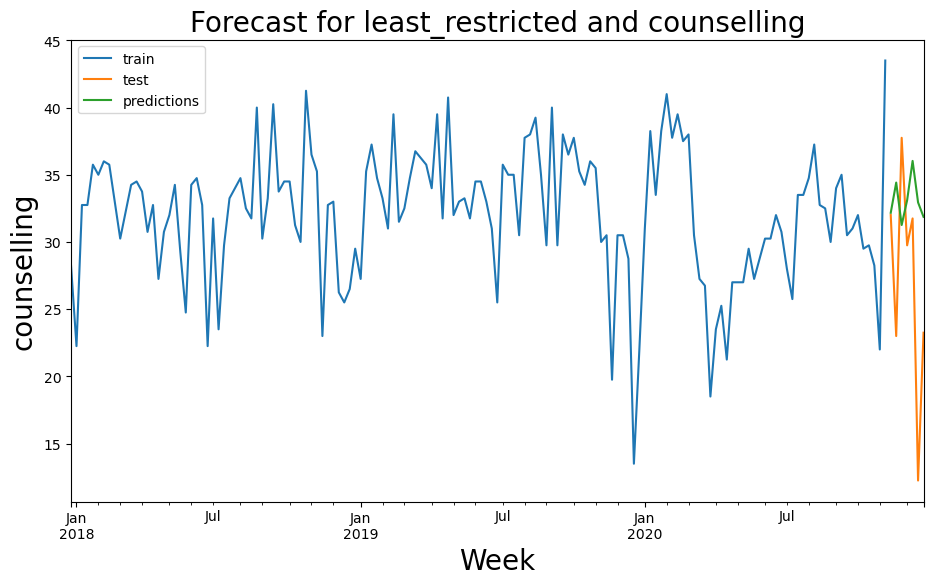


 Forecast for least_restricted and mental_health untill 2021-01-01 

Test error (mse): 58.03 



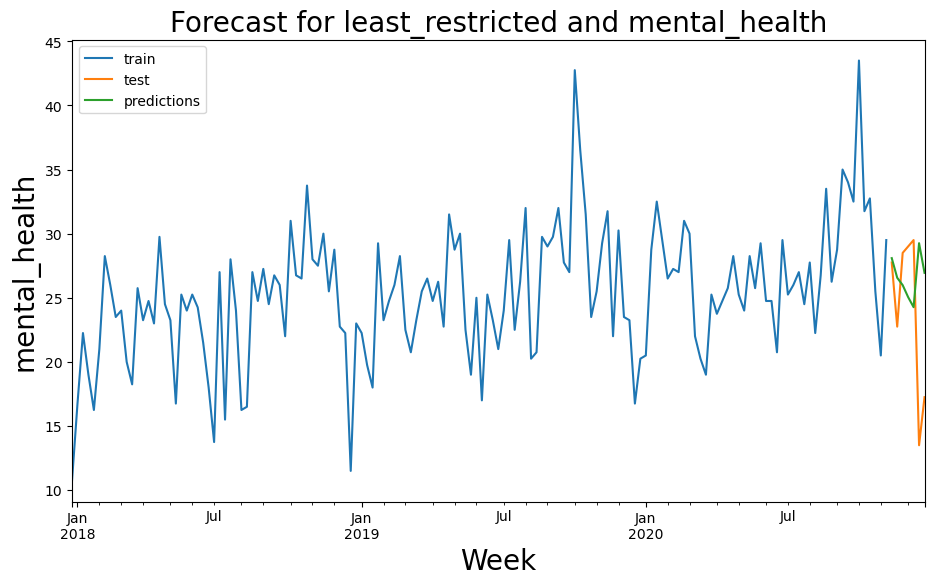

In [8]:
fa_mse_dic_least = {}
for search in searches_list:
        forecast = functions.forecast_file_search(file='least_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        plt.show()
        fa_mse_dic_least[f'{search}_ex'] = mse

Mean Standard Error (MSE) for all models is significantly lower than/just around 100, which is a relatively good result. We tried hyperparameter tuning but it did not improve the MSE.

### without Exoginous Variables 

In [9]:
for search in searches_list:
        mse = functions.forecast_file_search_without_exogin(file='least_restricted', period=period, steps=steps, search=search, regressor=Ridge(), lags=15)
        fa_mse_dic_least[search] = mse


 Forecast for least_restricted and depression untill 2021-01-01 

Test error (mse): 141.42 


 Forecast for least_restricted and anxiety untill 2021-01-01 

Test error (mse): 30.47 


 Forecast for least_restricted and addiction untill 2021-01-01 

Test error (mse): 15.06 


 Forecast for least_restricted and counselling untill 2021-01-01 

Test error (mse): 110.63 


 Forecast for least_restricted and mental_health untill 2021-01-01 

Test error (mse): 52.91 



In [10]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
rf_diff_least = functions.dict_diff(fa_mse_dic_least)
print(rf_diff_least)

{'depression': -72.67, 'anxiety': 38.28, 'addiction': 53.69, 'counselling': -41.88, 'mental_health': 15.84}


The recursive multistep forecasting models for the least restricted states were greatly improved for 'counselling' and particularly 'depression' searches by including exogenous features, whereas the models for forecasting 'anxiety', 'addiction' and 'mental health' performed better without.

---

# SARIMAX

## Forecasting Searches for Most Restricted States 

### with Exogenous Features


 Forecast for most_restricted and depression untill 2021-01-01 

MSE
37.76


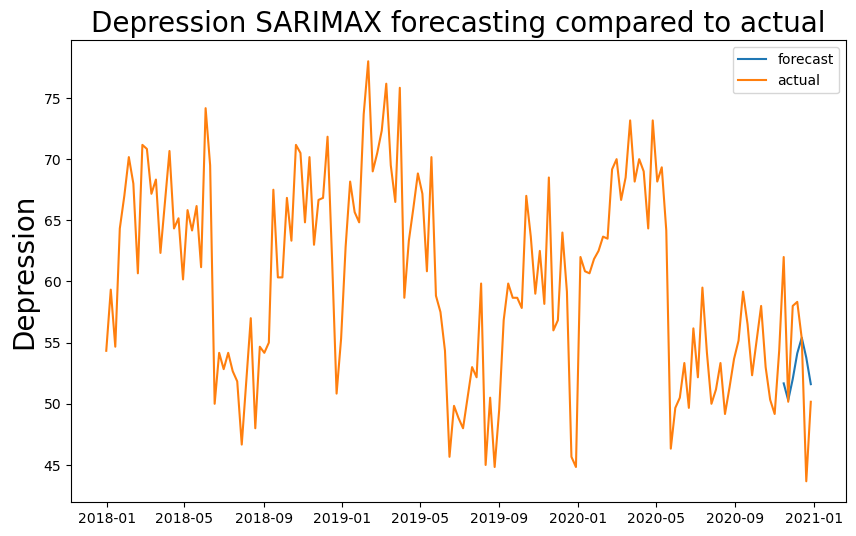


 Forecast for most_restricted and anxiety untill 2021-01-01 

MSE
32.57


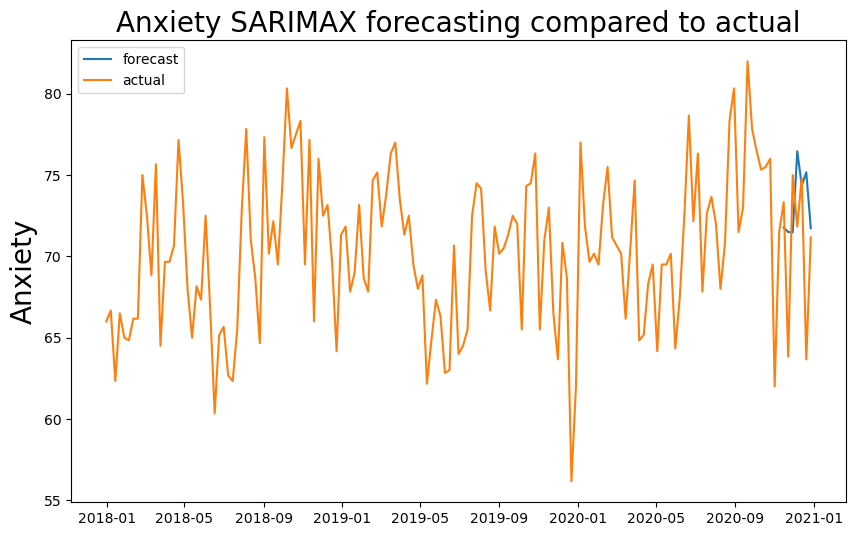


 Forecast for most_restricted and addiction untill 2021-01-01 

MSE
17.36


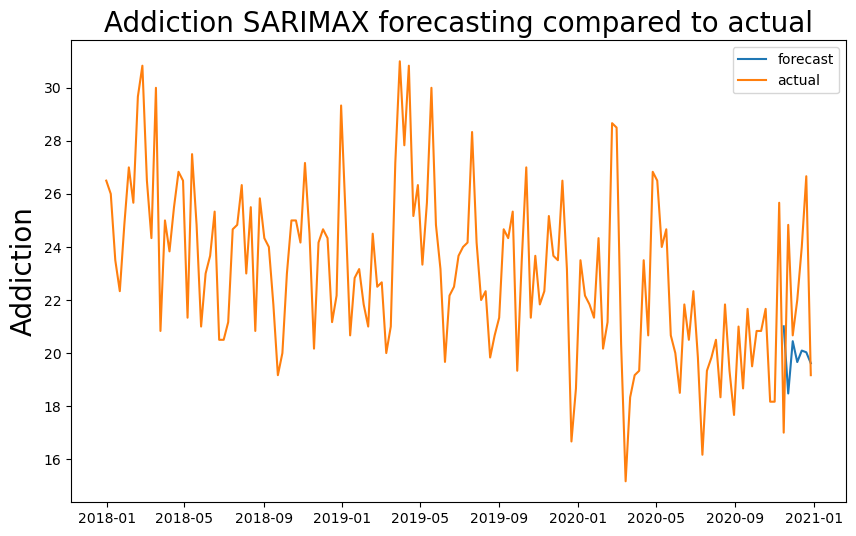


 Forecast for most_restricted and counselling untill 2021-01-01 

MSE
53.12


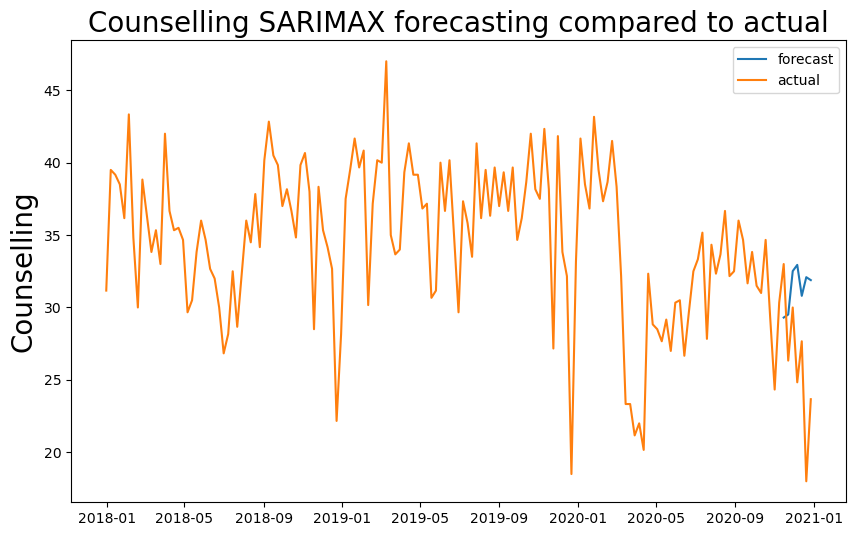


 Forecast for most_restricted and mental_health untill 2021-01-01 

MSE
96.2


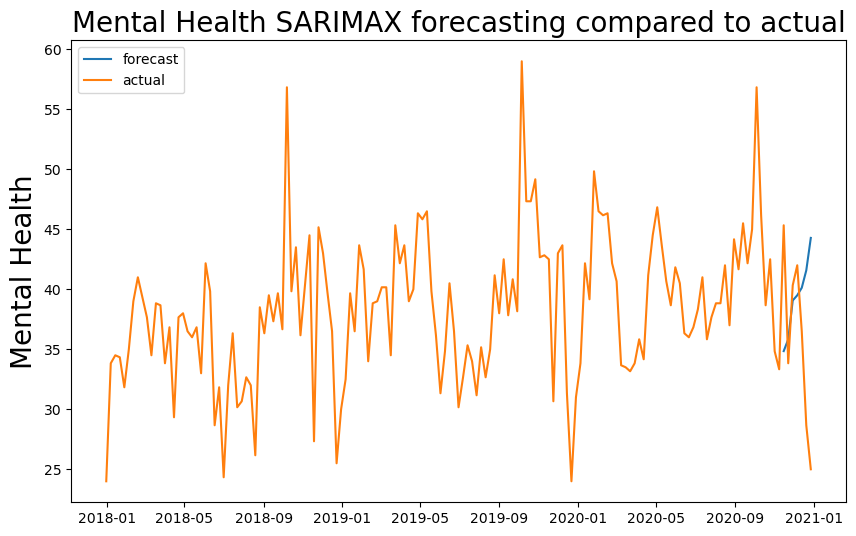

In [11]:
mse_dic_most = {}
for search in searches_list:
    mse = functions.sarimax_forecast_file_search(file='most_restricted', period=period, steps=steps, search=search, plot=True)
    mse_dic_most[f'{search}_ex'] = mse
    plt.show()

Overall, MSE of SARIMAX models is similar to that for Recursive Multi-step Forecasting, with values this time all falling below 100. Once again, we tried to grid search hyperparameters, but found little change in performance.

### without Exogenous Variables 

In [13]:
for search in searches_list:
    mse = functions.sarima_forecast_file_search(file='most_restricted', period=period, steps=steps, search=search, plot=False)
    mse_dic_most[search] = mse
    plt.show()


 Forecast for most_restricted and depression untill 2021-01-01 

MSE
37.09

 Forecast for most_restricted and anxiety untill 2021-01-01 

MSE
34.03

 Forecast for most_restricted and addiction untill 2021-01-01 

MSE
16.39

 Forecast for most_restricted and counselling untill 2021-01-01 

MSE
50.95

 Forecast for most_restricted and mental_health untill 2021-01-01 

MSE
104.76


In [14]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
sarima_diff_most = functions.dict_diff(mse_dic_most)
print(sarima_diff_most)

{'depression': 0.67, 'anxiety': -1.46, 'addiction': 0.97, 'counselling': 2.17, 'mental_health': -8.56}


The models for most restricted states were only improved by including exogenous features when forecasting 'mental health' and 'anxiety' (to a lesser extent) searches. There was no significant difference in performance for forecasting 'depression' and 'addiction' searches in models with or without exogenous features. The model without exogenous features performed slightly better for forecasting 'counselling' searches.

---

## Forecasting Searches for Least Restricted States 

### with Exogenous Features


 Forecast for least_restricted and depression untill 2020-05-30 

MSE
92.88


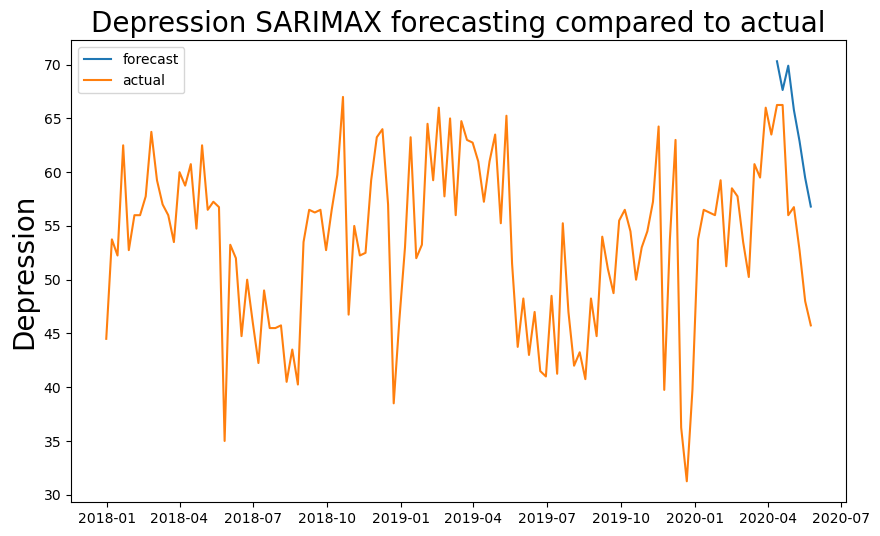


 Forecast for least_restricted and anxiety untill 2020-05-30 

MSE
14.9


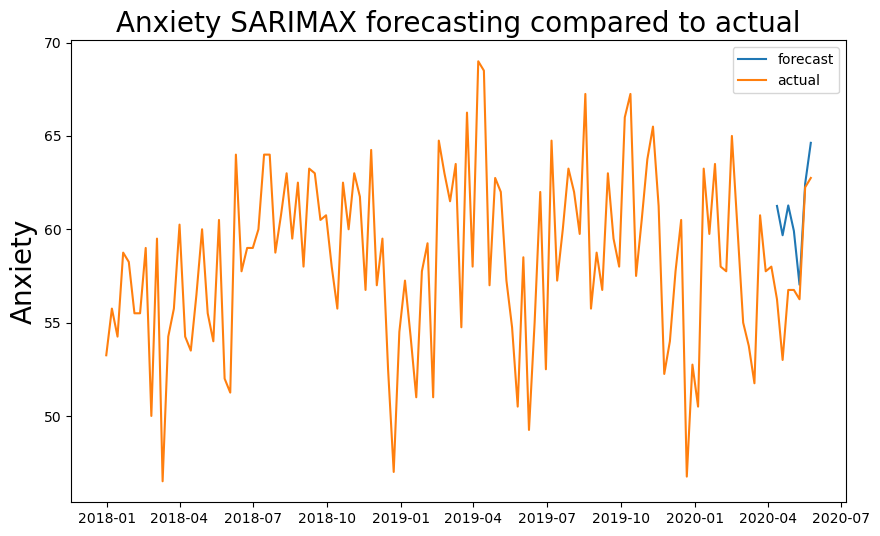


 Forecast for least_restricted and addiction untill 2020-05-30 

MSE
7.77


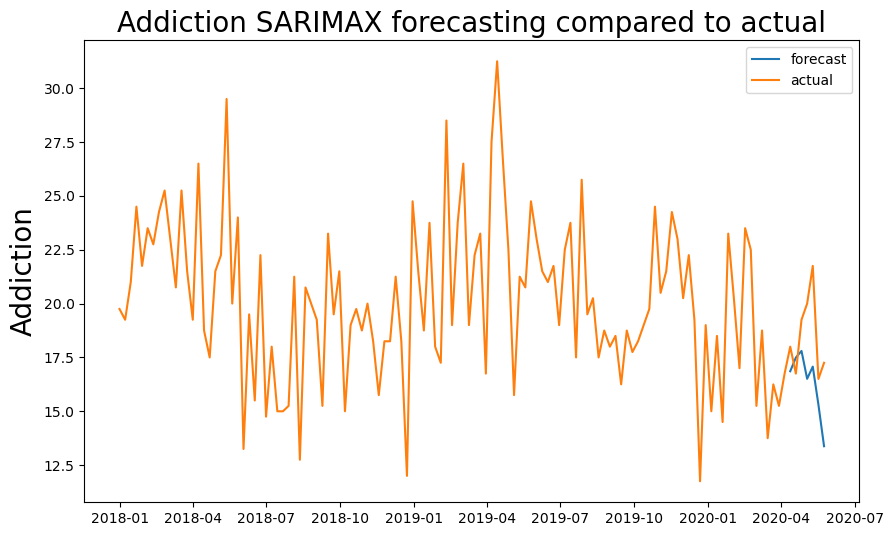


 Forecast for least_restricted and counselling untill 2020-05-30 

MSE
54.44


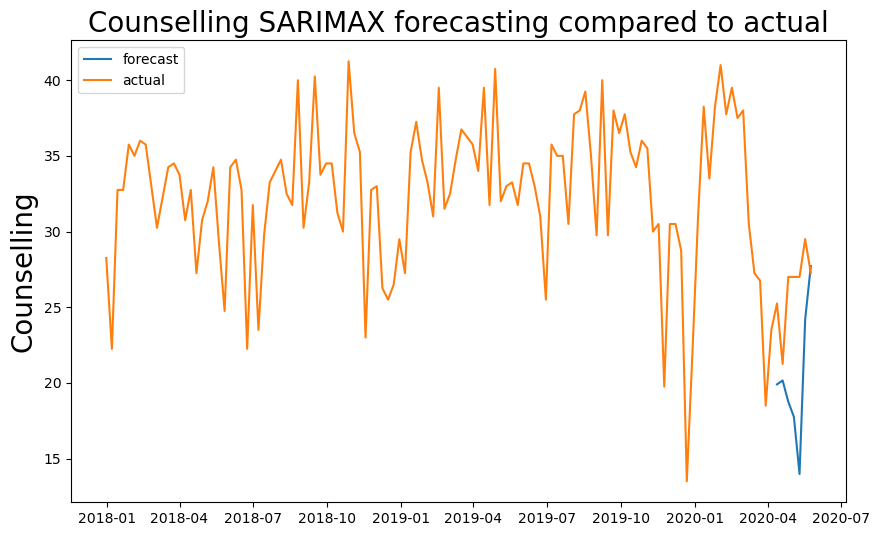


 Forecast for least_restricted and mental_health untill 2020-05-30 

MSE
64.13


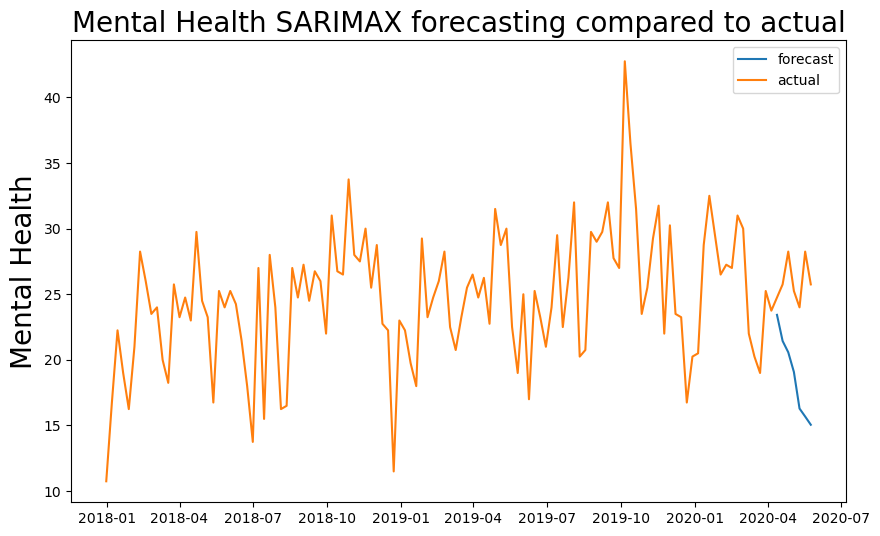

In [15]:
mse_dic_least = {}
for search in searches_list:
    mse = functions.sarimax_forecast_file_search(file='least_restricted', period='2020-05-30', steps=steps, search=search, plot=True)
    mse_dic_least[f'{search}_ex'] = mse
    plt.show()

### without Exogenous Features

In [16]:
for search in searches_list:
    mse = functions.sarima_forecast_file_search(file='least_restricted', period=period, steps=steps, search=search, plot=False)
    mse_dic_least[search] = mse
    plt.show()


 Forecast for least_restricted and depression untill 2021-01-01 

MSE
113.39

 Forecast for least_restricted and anxiety untill 2021-01-01 

MSE
26.85

 Forecast for least_restricted and addiction untill 2021-01-01 

MSE
9.17

 Forecast for least_restricted and counselling untill 2021-01-01 

MSE
86.44

 Forecast for least_restricted and mental_health untill 2021-01-01 

MSE
54.42


In [17]:
# Find differences between MSE with and without exogenous features. Negative values indicate that Exogenous features improved MSE
sarima_diff_least = functions.dict_diff(mse_dic_least)
print(sarima_diff_least)

{'depression': -20.51, 'anxiety': -11.95, 'addiction': -1.4, 'counselling': -32.0, 'mental_health': 9.71}


For least restricted states, adding covid restrictions as exogenous features increased the performance of 'depression', 'anxiety', 'counselling' and, to a lesser extent, 'addiction' forecasts. Adding exogenous features improved the performance of 'mental health' forecasting using SARIMAX.

---

# Plot the MSE differences for Most and Least restricted states with and without exogenous features

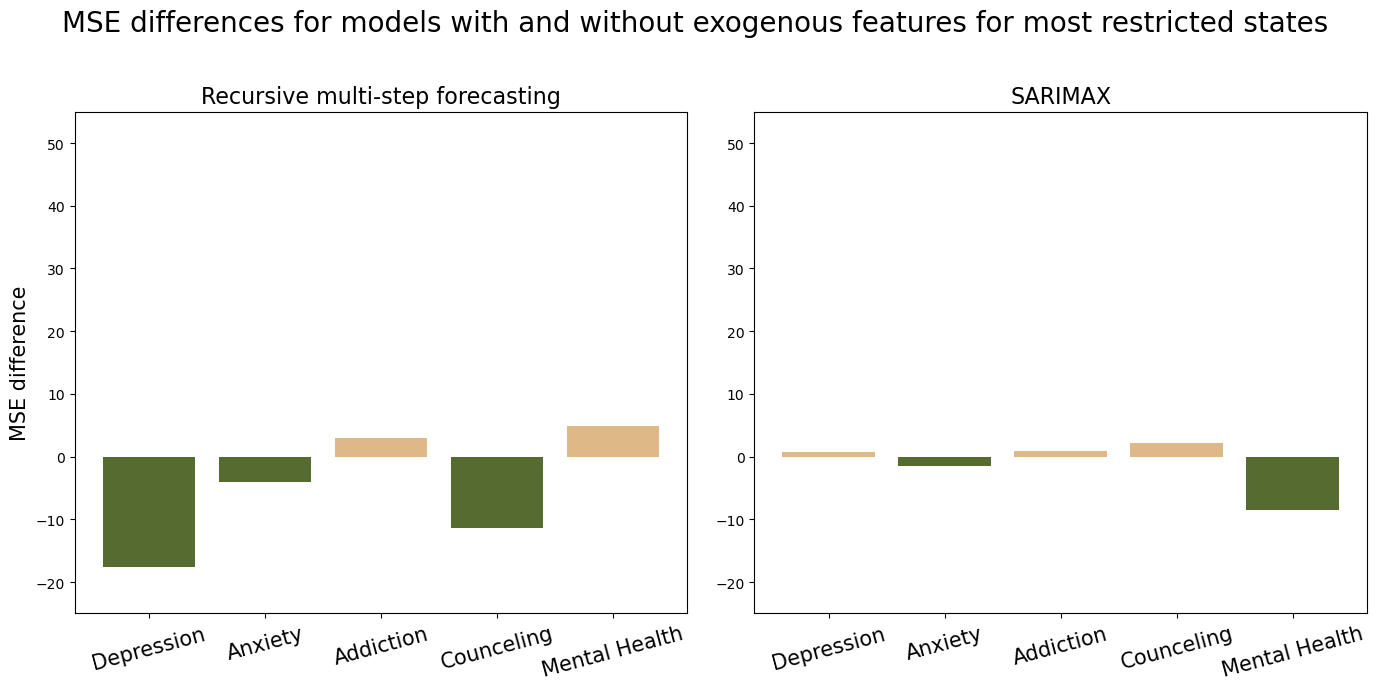

In [18]:
# Differences for most restricted states
functions.plot_MSE_difference(rf_diff_most, sarima_diff_most, 'most', period=period, ylim = [-25, 55])

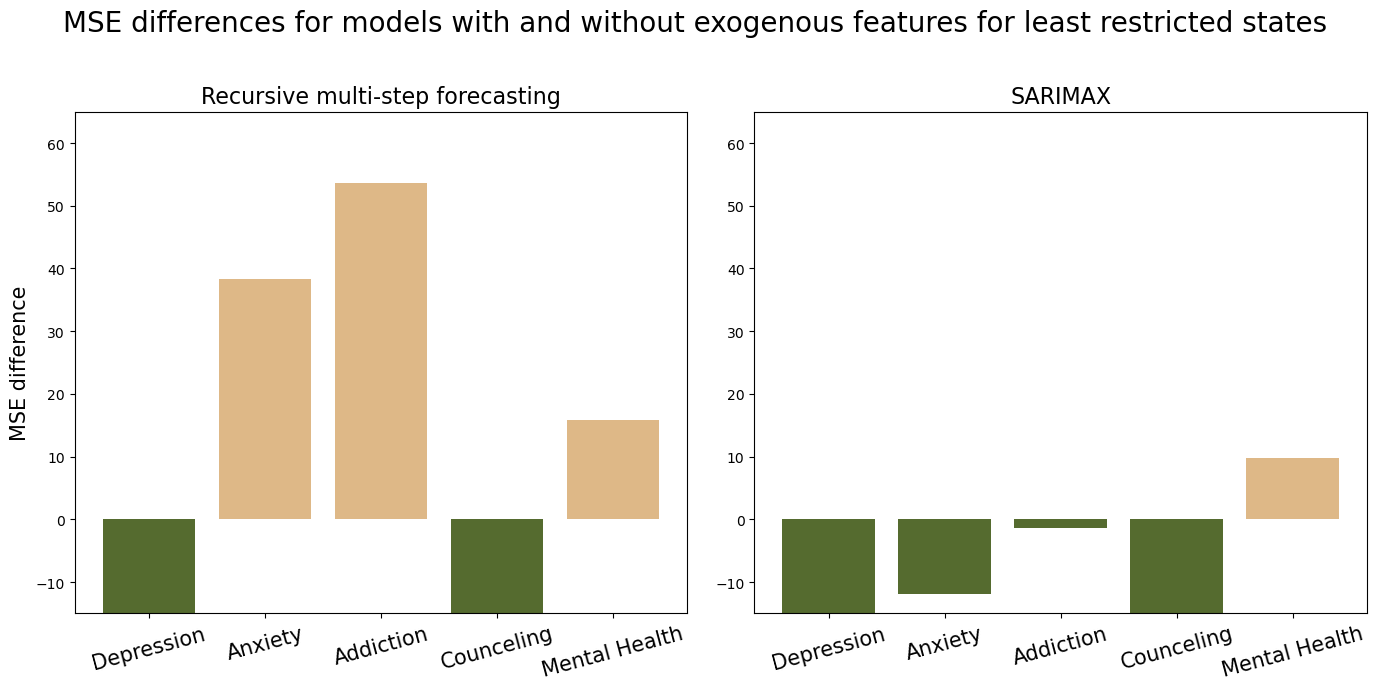

In [19]:
# Differences for Least restricted states
functions.plot_MSE_difference(rf_diff_least, sarima_diff_least, 'least', period=period, ylim = [-15, 65])

---

## Conclusion

Near the 'end' COVID-19 pandemic, with restrictions lifting in many states, the most restricted states did not benefit from adding exogenous features for both SARIMAX and recursive multi-step forecasting models in any of the search terms. However, adding restrictions as exogenous features improved the performance of forecasting 'depression', 'anxiety' and 'mental health' in recursive multi-step forecasting models, and the performance of forecasting 'mental health' searches using the SARIMAX model in these most restricted states. In the least restricted states,forecasting 'depression' and 'counselling' searches benefited from adding COVID Restrictions as exogenous features in both SARIMAX and recursive multi-step forecasting models.